### Preamble 

In [2]:
import os
import math
import copy
os.chdir('/Users/Ismael/code/research/repo/notebooks')

In [3]:
#chdir to where we can import packages.
import shear
import galfun
import fisher 
os.chdir('/Users/Ismael/code/research/repos/')

#plot inline
%matplotlib inline

/Users/Ismael/lsst/DarwinX86/anaconda/2.2.0/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


OSError: [Errno 2] No such file or directory: '/Users/Ismael/code/research/repos/'

### Relating multiplicative bias with bias on ellipticity. 

In [ ]:
#bias on ellipticity of a single galaxy relate to multiplicative bias
    #plot multiplicative bias vs bias on ellipticity?(which ellipticies? they are a lot of them)
    #check if depends on the magnitude of  ellipticity , do e = .2, e = .4, e = .1 ; 
    #circular psf. 

In [109]:
%%bash
python generate.py -p project5 -gal 1 --psf_model psf_gaussian --galaxy-model gaussian --e1 0 --e2 0 \
--y0 0 --x0 0 --flux 1. --psf_flux 1. --psf_fwhm .7 --snr 40 --hlr .5
cat project5/info.txt

Default values used in the analysis:
nx: 48
ny: 48
pixel_scale: 0.2

Galaxies drawn have the following parameters:
x0_1: 0.0
psf_fwhm_1: 0.7
hlr_1: 0.5
e2_1: 0.0
galaxy_model_1: gaussian
psf_flux_1: 1.0
flux_1: 1.0
e1_1: 0.0
psf_model_1: psf_gaussian
y0_1: 0.0
the results were produced with:
/Users/Ismael/code/research/repo

Fisher analysis (and fittings if included) used the following snr: 40.0

Steps used for the derivatives: 
hlr_1: 0.005
e2_1: 0.01
x0_1: 0.01
flux_1: 0.01
e1_1: 0.01
y0_1: 0.01

Condition number of Fisher Matrix:
37.1854013877


In [110]:
snr = 40
g_parameters = galfun.GParameters('project5')
fish = fisher.Fisher(g_parameters, snr)

In [115]:
#ellipticities to check for difference on shear 
ellips = [(0,0),(0.1,0),(0,.1),(.2,0),(0,.2),(.4,0),(0,.4)]
id_params = copy.deepcopy(fish.g_parameters.id_params)
ids = id_params.keys()
g = .05
shears = []

for ellip in ellips:
    id_params[ids[0]]['e1'] = ellip[0]
    id_params[ids[0]]['e2'] = ellip[1]
    g_parameters = galfun.GParameters(id_params=id_params)
    fish = fisher.Fisher(g_parameters, snr)
    shears.append(shear.shearBias(fish,g))

In [114]:
for s in shears: # g= .1
    print s/.1

(-0.00310161005473-1.34614097647e-09j)
(-0.0030511243478-4.09216358715e-10j)
(-0.0030511243478-4.09216358715e-10j)
(-0.00290416892616-1.66333983624e-10j)
(-0.00290416892616-1.66333983624e-10j)
(-0.00236861451413-1.02602269273e-09j)
(-0.00236861451413-1.02602269273e-09j)


In [116]:
for s in shears: #g = .05
    print s/.05

(-0.00311118492391+1.49150011786e-09j)
(-0.00306996551975+3.28850974229e-10j)
(-0.00306996551975+3.28850974229e-10j)
(-0.00292709756953-4.05882862042e-10j)
(-0.00292709756953-4.05882862042e-10j)
(-0.00236544379732-1.73068929558e-09j)
(-0.00236544379732-1.73068929558e-09j)


### Multiplicative bias vs size on a exponential+moffat galaxy 

In [22]:
#ring test put together with m1,m2 vs size. do on more realistic shape exponential + moffat. 
    #paranoid check m1 = m2 plots (pixelisation) and everything. 

In [61]:
%%bash 
#create project with galaxy and draw image to create an info file. 
python generate.py -p project6 -gal 1 --psf_model psf_moffat --galaxy-model exponential --e1 .2 --e2 .2 \
--y0 0 --x0 0 --flux 1. --psf_flux 1. --hlr .5 --psf_fwhm .7 --psf_beta 3.0 --snr 20

#show info file.
cat project6/info.txt

Default values used in the analysis:
nx: 48
ny: 48
pixel_scale: 0.2

Galaxies drawn have the following parameters:
x0_1: 0.0
psf_fwhm_1: 0.7
hlr_1: 0.5
e2_1: 0.2
galaxy_model_1: exponential
psf_flux_1: 1.0
flux_1: 1.0
psf_beta_1: 3.0
e1_1: 0.2
psf_model_1: psf_moffat
y0_1: 0.0
the results were produced with:
/Users/Ismael/code/research/repo

Fisher analysis (and fittings if included) used the following snr: 20.0

Steps used for the derivatives: 
hlr_1: 0.005
e2_1: 0.01
x0_1: 0.01
flux_1: 0.01
e1_1: 0.01
y0_1: 0.01

Condition number of Fisher Matrix:
40.8844922983


In [63]:
#read galaxy from project1 and create fisher object.
snr = 20
g_parameters = galfun.GParameters('project6')
fish = fisher.Fisher(g_parameters, snr)

In [69]:
import numpy as np
#plot of m1,m2 vs size.
#for g2 = 0
steps = 5
hlr_range = (.15, .5)
hlrs = np.linspace(hlr_range[0], hlr_range[1], steps)
m1s = []
m2s = []

id_params = copy.deepcopy(fish.g_parameters.id_params)
snr = fish.snr
for hlr in hlrs:
    gal_id = id_params.keys()[0]
    id_params[gal_id]['hlr'] = hlr
    g_parameters = galfun.GParameters(id_params=id_params)
    fish = fisher.Fisher(g_parameters, snr)
    m1, c1, m2, c2 = shear.getMultAddBiasG1(fish)
    m1s.append(m1)
    m2s.append(m2)
        

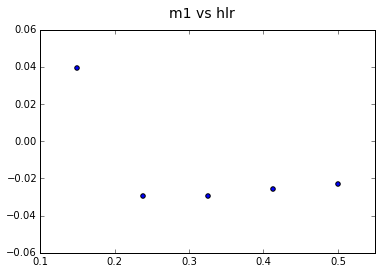

In [73]:
import matplotlib.pyplot as plt
figure = plt.figure()
figure.suptitle('m1 vs hlr', fontsize=14)
ax = figure.add_subplot(111)
ax.scatter(hlrs, m1s)

### Looking at bulge + disk

In [ ]:
#exercise bulge + disk (same center && ellipticity && ) and do multiplicative bias too.
    #correlation matrix. too and condition number. 
    #compare 6 vs 8 free parameter object.

In [ ]:
#do multiplicative bias for 8 parameter free object.

In [7]:
%%bash 
#create project with galaxy and draw image to create an info file. 
python generate.py -p project7 -gal 1 --psf_model psf_gaussian --galaxy-model bulgeDisk --e1 .2 --e2 .2 --y0 0 --x0 0 \
--flux_d 1. --flux_b 1. --psf_flux 1. --hlr_b .5 --hlr_d .5 --psf_fwhm .7 --snr 20 --n_d 1 --n_b 4

#plot matrices 

#show info file.
cat project7/info.txt

Default values used in the analysis:
nx: 48
ny: 48
pixel_scale: 0.2

Galaxies drawn have the following parameters:
flux_d_1: 1.0
x0_1: 0.0
psf_fwhm_1: 0.7
n_b_1: 4.0
e2_1: 0.2
hlr_b_1: 0.5
galaxy_model_1: bulgeDisk
psf_flux_1: 1.0
flux_b_1: 1.0
psf_model_1: psf_gaussian
e1_1: 0.2
hlr_d_1: 0.5
n_d_1: 1.0
y0_1: 0.0
the results were produced with:
/Users/Ismael/code/research/repo

Fisher analysis (and fittings if included) used the following snr: 20.0

Steps used for the derivatives: 
flux_d_1: 0.01
e2_1: 0.01
hlr_b_1: 0.005
x0_1: 0.01
flux_b_1: 0.01
e1_1: 0.01
hlr_d_1: 0.005
y0_1: 0.01

Condition number of Fisher Matrix:
2849.32900539


In [8]:
%%bash
#display galaxy 
python display.py -d --snr 20 -f -p project7 -c --hide --covariance

In [85]:
snr = 40
g_parameters = galfun.GParameters('project7')
fish = fisher.Fisher(g_parameters, snr)

In [87]:
m1,c1,m2,c2 = shear.getMultAddBiasG1(fish)
print m1,c1,m2,c2

-0.00710558554569 8.92767971857e-06 nan nan


In [89]:
m1,c1,m2,c2 = shear.getMultAddBiasG2(fish)
print m1,m2,c1,c2

nan nan -0.00137276032353 -4.09095313666e-05


In [ ]:
#do multiplicative bias for 6 parameter free object. 

In [9]:
%%bash 
#create project with galaxy and draw image to create an info file. 
python generate.py -p project8 -gal 1 --psf_model psf_gaussian --galaxy-model bulgeDisk6 --e1 .2 --e2 .2 --y0 0 \
--x0 0 --flux 1. --psf_flux 1. --hlr .5 --psf_fwhm .7 --n_d 1 --n_b 4 --snr 40

#show info file.
cat project8/info.txt

Default values used in the analysis:
nx: 48
ny: 48
pixel_scale: 0.2

Galaxies drawn have the following parameters:
x0_1: 0.0
psf_fwhm_1: 0.7
hlr_1: 0.5
n_b_1: 4.0
e2_1: 0.2
galaxy_model_1: bulgeDisk6
psf_flux_1: 1.0
psf_model_1: psf_gaussian
flux_1: 1.0
e1_1: 0.2
n_d_1: 1.0
y0_1: 0.0
the results were produced with:
/Users/Ismael/code/research/repo

Fisher analysis (and fittings if included) used the following snr: 40.0

Steps used for the derivatives: 
hlr_1: 0.005
e2_1: 0.01
x0_1: 0.01
flux_1: 0.01
e1_1: 0.01
y0_1: 0.01

Condition number of Fisher Matrix:
45.8421306455


In [10]:
%%bash
python display.py -d -f -c -p project8 --snr 20 --hide --covariance

In [17]:
snr = 40
g_parameters = galfun.GParameters('project8')
fish = fisher.Fisher(g_parameters, snr)

['x0', 'y0', 'flux', 'hlr', 'e1', 'e2', 'eta1', 'eta2', 'n_d', 'n_b']


In [19]:
m1,c1,m2,c2 = shear.getMultAddBiasG1(fish) 
print m1, c1, m2, c2

-0.00689285388238 -2.99814286987e-07 nan nan


In [ ]:
m1,c1,m2,c2 = shear.getMultAddBiasG2(fish) 
print m1, c1, m2, c2

## Doubts

In [ ]:
# about my new module models.py, how to organize effectively capturing the structure. 
# n_b = 4 and n_d = 1